Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.UDCK9U_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.3244 - loss: 1.5286 - val_accuracy: 0.5191 - val_loss: 1.1740
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 92s 994ms/step - accuracy: 0.4974 - loss: 1.1910 - val_accuracy: 0.6131 - val_loss: 1.0057
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 91s 994ms/step - accuracy: 0.5853 - loss: 1.0511 - val_accuracy: 0.6512 - val_loss: 0.8781
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6592 - loss: 0.8872 - val_accuracy: 0.6485 - val_loss: 0.8239
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 135s 936ms/step - accuracy: 0.7020 - loss: 0.7893 - val_accuracy: 0.6935 - val_loss: 0.7670
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 88s 957ms/step - accuracy: 0.7432 - loss: 0.6904 - val_accuracy: 0.7248 - val_loss: 0.7562
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 91s 991ms/step - accuracy: 0.7947 - loss: 0.5716 - val_accuracy: 0.6880 - val_loss: 0.7904
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.8276 - loss: 0.4721 - val_accuracy: 0.6826 - va

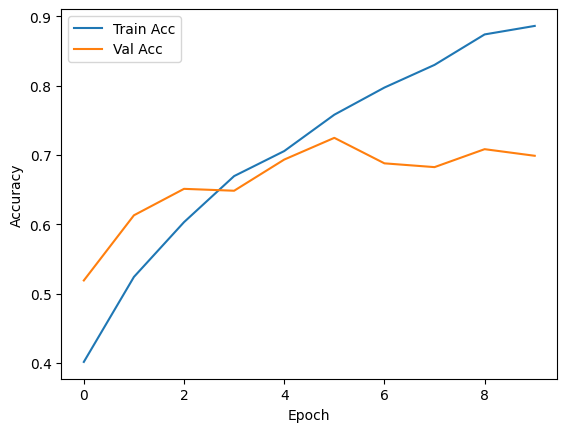

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

IMG_SIZE = 128
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(preprocess, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds_test = ds_test.map(preprocess, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).prefetch(AUTOTUNE)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(ds_train, epochs=10, validation_data=ds_test)

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_true = []
y_pred = []

for images, labels in ds_test:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0157
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.0007e-04
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 3.3948e-04
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 3.1668e-04
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 3.1695e-04
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 3.2483e-04
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 2.4178e-04
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.6431e-04
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.7196e-04
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 2.5040e-04
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 2.3947e-04
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.6943e-04
Epoch 13/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.1818e-04
Epoch 14/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 2.6976e-04
Epoch 15/20
49/49 

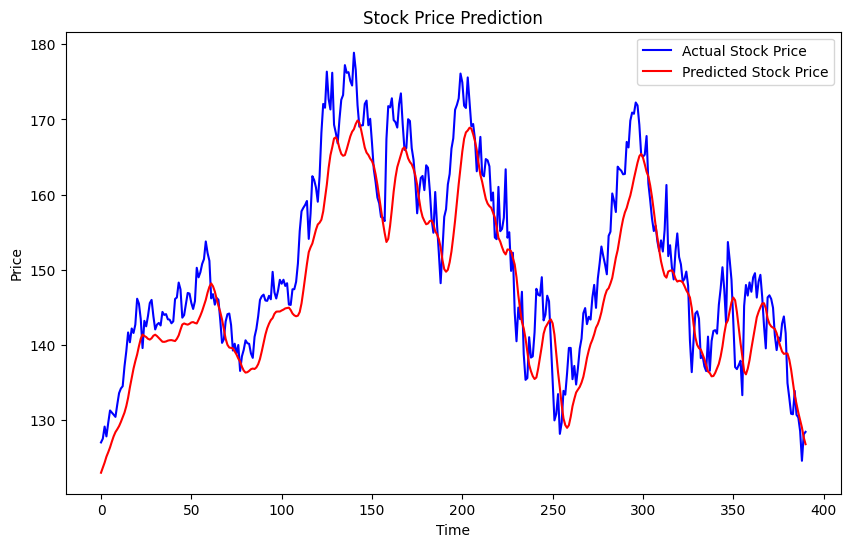

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

df = pd.read_csv('A5.csv')
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

X, y = [], []
sequence_length = 60
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=20)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
